## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9476466	total: 48.2ms	remaining: 48.1s
1:	learn: 0.9279209	total: 49.3ms	remaining: 24.6s
2:	learn: 0.9075104	total: 50.3ms	remaining: 16.7s
3:	learn: 0.8909497	total: 51.4ms	remaining: 12.8s
4:	learn: 0.8742922	total: 52.4ms	remaining: 10.4s
5:	learn: 0.8570174	total: 53.4ms	remaining: 8.84s
6:	learn: 0.8408368	total: 54.4ms	remaining: 7.72s
7:	learn: 0.8245963	total: 55.3ms	remaining: 6.86s
8:	learn: 0.8094011	total: 56.4ms	remaining: 6.21s
9:	learn: 0.7931708	total: 57.5ms	remaining: 5.69s
10:	learn: 0.7781215	total: 58.4ms	remaining: 5.25s
11:	learn: 0.7635619	total: 59.3ms	remaining: 4.88s
12:	learn: 0.7489316	total: 60.4ms	remaining: 4.58s
13:	learn: 0.7342226	total: 61.4ms	remaining: 4.33s
14:	learn: 0.7219144	total: 62.4ms	remaining: 4.1s
15:	learn: 0.7080754	total: 63.4ms	remaining: 3.9s
16:	learn: 0.6955423	total: 64.5ms	remaining: 3.73s
17:	learn: 0.6847886	total: 65.5ms	remaining: 3.58s
18:	learn: 0.6733026	total: 66.6ms	remaining: 3

88:	learn: 0.3334586	total: 141ms	remaining: 1.44s
89:	learn: 0.3308859	total: 142ms	remaining: 1.44s
90:	learn: 0.3287789	total: 143ms	remaining: 1.43s
91:	learn: 0.3269911	total: 144ms	remaining: 1.42s
92:	learn: 0.3255522	total: 145ms	remaining: 1.41s
93:	learn: 0.3239144	total: 146ms	remaining: 1.41s
94:	learn: 0.3222690	total: 147ms	remaining: 1.4s
95:	learn: 0.3216165	total: 148ms	remaining: 1.39s
96:	learn: 0.3200741	total: 149ms	remaining: 1.39s
97:	learn: 0.3189519	total: 150ms	remaining: 1.38s
98:	learn: 0.3178926	total: 151ms	remaining: 1.37s
99:	learn: 0.3153593	total: 152ms	remaining: 1.37s
100:	learn: 0.3135303	total: 153ms	remaining: 1.36s
101:	learn: 0.3114614	total: 154ms	remaining: 1.35s
102:	learn: 0.3101857	total: 155ms	remaining: 1.35s
103:	learn: 0.3093354	total: 156ms	remaining: 1.34s
104:	learn: 0.3079291	total: 157ms	remaining: 1.34s
105:	learn: 0.3061007	total: 158ms	remaining: 1.33s
106:	learn: 0.3047189	total: 159ms	remaining: 1.33s
107:	learn: 0.3024317	tot

217:	learn: 0.2220740	total: 275ms	remaining: 988ms
218:	learn: 0.2215910	total: 277ms	remaining: 987ms
219:	learn: 0.2212757	total: 278ms	remaining: 984ms
220:	learn: 0.2209582	total: 279ms	remaining: 983ms
221:	learn: 0.2203526	total: 280ms	remaining: 980ms
222:	learn: 0.2197753	total: 281ms	remaining: 978ms
223:	learn: 0.2193790	total: 282ms	remaining: 976ms
224:	learn: 0.2190776	total: 283ms	remaining: 974ms
225:	learn: 0.2186518	total: 284ms	remaining: 972ms
226:	learn: 0.2180694	total: 285ms	remaining: 970ms
227:	learn: 0.2178162	total: 286ms	remaining: 968ms
228:	learn: 0.2173414	total: 287ms	remaining: 966ms
229:	learn: 0.2168845	total: 288ms	remaining: 964ms
230:	learn: 0.2166168	total: 289ms	remaining: 962ms
231:	learn: 0.2158408	total: 290ms	remaining: 960ms
232:	learn: 0.2154181	total: 291ms	remaining: 959ms
233:	learn: 0.2149913	total: 292ms	remaining: 956ms
234:	learn: 0.2141943	total: 293ms	remaining: 955ms
235:	learn: 0.2138180	total: 294ms	remaining: 953ms
236:	learn: 

338:	learn: 0.1691730	total: 409ms	remaining: 797ms
339:	learn: 0.1688610	total: 410ms	remaining: 796ms
340:	learn: 0.1684578	total: 411ms	remaining: 795ms
341:	learn: 0.1682272	total: 412ms	remaining: 793ms
342:	learn: 0.1677802	total: 414ms	remaining: 792ms
343:	learn: 0.1675298	total: 415ms	remaining: 792ms
344:	learn: 0.1672572	total: 417ms	remaining: 792ms
345:	learn: 0.1668801	total: 418ms	remaining: 791ms
346:	learn: 0.1666936	total: 419ms	remaining: 789ms
347:	learn: 0.1662227	total: 421ms	remaining: 788ms
348:	learn: 0.1658718	total: 422ms	remaining: 787ms
349:	learn: 0.1655850	total: 423ms	remaining: 786ms
350:	learn: 0.1651844	total: 424ms	remaining: 785ms
351:	learn: 0.1646341	total: 426ms	remaining: 783ms
352:	learn: 0.1643557	total: 427ms	remaining: 782ms
353:	learn: 0.1638763	total: 428ms	remaining: 780ms
354:	learn: 0.1634380	total: 429ms	remaining: 779ms
355:	learn: 0.1629505	total: 430ms	remaining: 778ms
356:	learn: 0.1627946	total: 431ms	remaining: 776ms
357:	learn: 

465:	learn: 0.1321874	total: 544ms	remaining: 623ms
466:	learn: 0.1321268	total: 545ms	remaining: 622ms
467:	learn: 0.1318676	total: 546ms	remaining: 621ms
468:	learn: 0.1315585	total: 547ms	remaining: 619ms
469:	learn: 0.1312741	total: 548ms	remaining: 618ms
470:	learn: 0.1311415	total: 549ms	remaining: 617ms
471:	learn: 0.1308581	total: 550ms	remaining: 616ms
472:	learn: 0.1306468	total: 551ms	remaining: 614ms
473:	learn: 0.1303654	total: 552ms	remaining: 613ms
474:	learn: 0.1300922	total: 553ms	remaining: 612ms
475:	learn: 0.1299902	total: 554ms	remaining: 610ms
476:	learn: 0.1298056	total: 555ms	remaining: 609ms
477:	learn: 0.1295500	total: 556ms	remaining: 608ms
478:	learn: 0.1292470	total: 557ms	remaining: 606ms
479:	learn: 0.1290692	total: 559ms	remaining: 605ms
480:	learn: 0.1287351	total: 560ms	remaining: 604ms
481:	learn: 0.1285861	total: 561ms	remaining: 602ms
482:	learn: 0.1284262	total: 562ms	remaining: 601ms
483:	learn: 0.1281817	total: 563ms	remaining: 600ms
484:	learn: 

592:	learn: 0.1078814	total: 677ms	remaining: 465ms
593:	learn: 0.1076893	total: 678ms	remaining: 464ms
594:	learn: 0.1075716	total: 679ms	remaining: 463ms
595:	learn: 0.1073320	total: 680ms	remaining: 461ms
596:	learn: 0.1070789	total: 681ms	remaining: 460ms
597:	learn: 0.1069116	total: 683ms	remaining: 459ms
598:	learn: 0.1067687	total: 684ms	remaining: 458ms
599:	learn: 0.1065037	total: 685ms	remaining: 456ms
600:	learn: 0.1062799	total: 686ms	remaining: 455ms
601:	learn: 0.1062176	total: 687ms	remaining: 454ms
602:	learn: 0.1059787	total: 688ms	remaining: 453ms
603:	learn: 0.1057464	total: 689ms	remaining: 452ms
604:	learn: 0.1057063	total: 690ms	remaining: 450ms
605:	learn: 0.1055943	total: 691ms	remaining: 449ms
606:	learn: 0.1054050	total: 692ms	remaining: 448ms
607:	learn: 0.1051261	total: 693ms	remaining: 447ms
608:	learn: 0.1049631	total: 694ms	remaining: 445ms
609:	learn: 0.1047479	total: 695ms	remaining: 444ms
610:	learn: 0.1045955	total: 696ms	remaining: 443ms
611:	learn: 

721:	learn: 0.0887839	total: 814ms	remaining: 313ms
722:	learn: 0.0886638	total: 815ms	remaining: 312ms
723:	learn: 0.0885312	total: 816ms	remaining: 311ms
724:	learn: 0.0884300	total: 818ms	remaining: 310ms
725:	learn: 0.0882224	total: 819ms	remaining: 309ms
726:	learn: 0.0880627	total: 821ms	remaining: 308ms
727:	learn: 0.0879553	total: 822ms	remaining: 307ms
728:	learn: 0.0877824	total: 823ms	remaining: 306ms
729:	learn: 0.0877055	total: 824ms	remaining: 305ms
730:	learn: 0.0875185	total: 825ms	remaining: 304ms
731:	learn: 0.0874808	total: 826ms	remaining: 303ms
732:	learn: 0.0873430	total: 827ms	remaining: 301ms
733:	learn: 0.0871748	total: 829ms	remaining: 300ms
734:	learn: 0.0869930	total: 830ms	remaining: 299ms
735:	learn: 0.0869624	total: 831ms	remaining: 298ms
736:	learn: 0.0868958	total: 832ms	remaining: 297ms
737:	learn: 0.0867940	total: 833ms	remaining: 296ms
738:	learn: 0.0866926	total: 834ms	remaining: 294ms
739:	learn: 0.0865063	total: 835ms	remaining: 293ms
740:	learn: 

840:	learn: 0.0751055	total: 947ms	remaining: 179ms
841:	learn: 0.0750802	total: 949ms	remaining: 178ms
842:	learn: 0.0749588	total: 950ms	remaining: 177ms
843:	learn: 0.0749364	total: 951ms	remaining: 176ms
844:	learn: 0.0748929	total: 952ms	remaining: 175ms
845:	learn: 0.0747206	total: 953ms	remaining: 173ms
846:	learn: 0.0746146	total: 954ms	remaining: 172ms
847:	learn: 0.0744636	total: 955ms	remaining: 171ms
848:	learn: 0.0744340	total: 956ms	remaining: 170ms
849:	learn: 0.0743271	total: 957ms	remaining: 169ms
850:	learn: 0.0742609	total: 958ms	remaining: 168ms
851:	learn: 0.0742083	total: 959ms	remaining: 167ms
852:	learn: 0.0741488	total: 960ms	remaining: 165ms
853:	learn: 0.0741149	total: 961ms	remaining: 164ms
854:	learn: 0.0740287	total: 962ms	remaining: 163ms
855:	learn: 0.0740113	total: 963ms	remaining: 162ms
856:	learn: 0.0738334	total: 964ms	remaining: 161ms
857:	learn: 0.0737628	total: 965ms	remaining: 160ms
858:	learn: 0.0737160	total: 966ms	remaining: 159ms
859:	learn: 

966:	learn: 0.0648829	total: 1.08s	remaining: 36.7ms
967:	learn: 0.0647936	total: 1.08s	remaining: 35.6ms
968:	learn: 0.0646963	total: 1.08s	remaining: 34.5ms
969:	learn: 0.0646904	total: 1.08s	remaining: 33.4ms
970:	learn: 0.0646833	total: 1.08s	remaining: 32.3ms
971:	learn: 0.0646672	total: 1.08s	remaining: 31.2ms
972:	learn: 0.0646494	total: 1.08s	remaining: 30.1ms
973:	learn: 0.0645869	total: 1.08s	remaining: 28.9ms
974:	learn: 0.0645708	total: 1.08s	remaining: 27.8ms
975:	learn: 0.0644177	total: 1.08s	remaining: 26.7ms
976:	learn: 0.0643729	total: 1.09s	remaining: 25.6ms
977:	learn: 0.0643644	total: 1.09s	remaining: 24.5ms
978:	learn: 0.0641762	total: 1.09s	remaining: 23.4ms
979:	learn: 0.0640506	total: 1.09s	remaining: 22.2ms
980:	learn: 0.0640390	total: 1.09s	remaining: 21.1ms
981:	learn: 0.0639258	total: 1.09s	remaining: 20ms
982:	learn: 0.0639150	total: 1.09s	remaining: 18.9ms
983:	learn: 0.0637288	total: 1.09s	remaining: 17.8ms
984:	learn: 0.0636582	total: 1.09s	remaining: 16

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

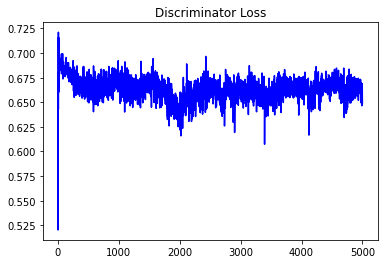

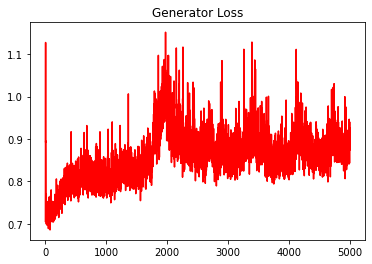

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

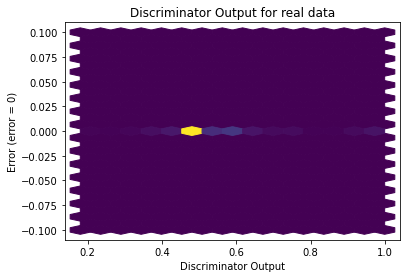

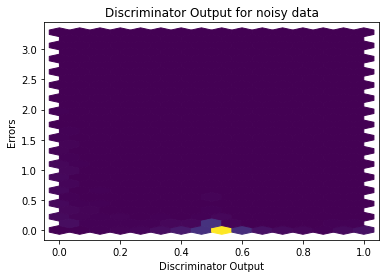

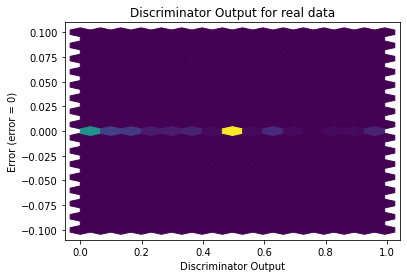

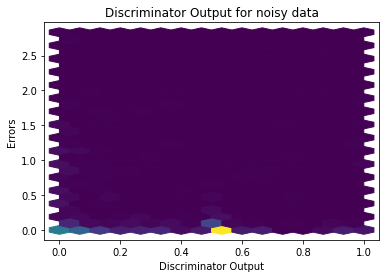

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


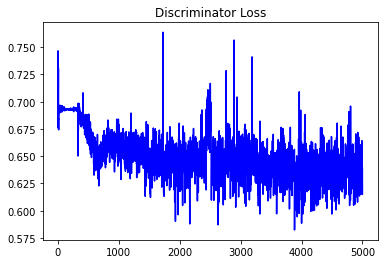

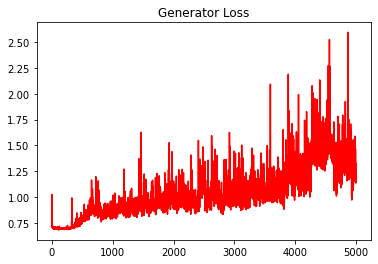

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

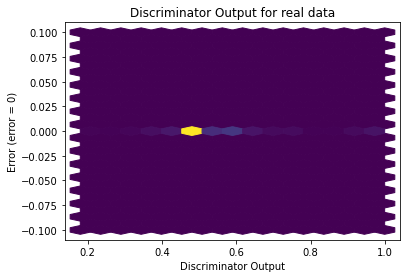

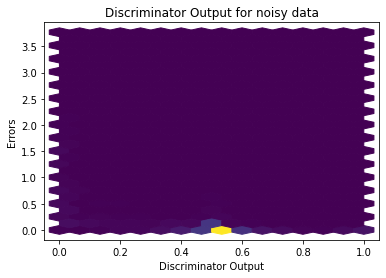

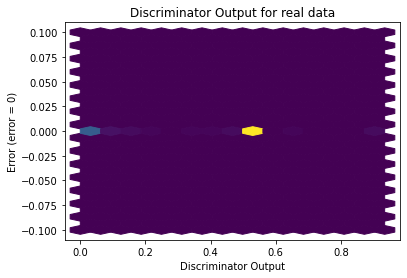

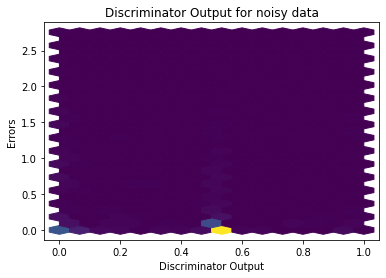

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9985]], device='cuda:0', requires_grad=True)
